In [32]:
import random

import numpy as np
from qiskit import transpile
from qiskit.circuit.library import EfficientSU2
from qiskit_aer.primitives import Estimator, Sampler
from qiskit.providers.fake_provider import FakeSherbrooke
from qiskit.quantum_info import PauliList

from circuit_knitting.cutting import (
    find_gate_cuts,
    execute_experiments,
    reconstruct_expectation_values,
)
from circuit_knitting.cutting.qpd import decompose_qpd_instructions

In [33]:
NUM_CUTS = 4
WIDTHS_TO_CHECK = [5, 10, 15, 20, 25, 30, 35, 40]
REPS_TO_CHECK = [1, 2, 3, 4]

backend = FakeSherbrooke()
transpilation_options = {"backend": backend}

results = {}
for num_qubits in WIDTHS_TO_CHECK:
    for reps in REPS_TO_CHECK:
        circuit = EfficientSU2(
            num_qubits=num_qubits, entanglement="sca", reps=reps
        ).decompose()
        circuit.assign_parameters([0.2] * len(circuit.parameters), inplace=True)
        transpilation_options['initial_layout'] = range(num_qubits)
        transpiled_qc = transpile(circuit, **transpilation_options)
        qpd_circuit, bases, cut_indices = find_gate_cuts(
            circuit, NUM_CUTS, transpilation_options
        )
        # Set some arbitrary bases to which the QPD gates should decompose
        for idx in cut_indices:
            qpd_circuit[idx].operation.basis_id = random.randint(0, 5)

        # Decompose QPDGates in a circuit into Qiskit operations and measurements
        qpd_circuit_dx = decompose_qpd_instructions(
            qpd_circuit, [[idx] for idx in cut_indices]
        )

        # Transpile the decomposed circuit to the same layout
        transpiled_qpd_circuit = transpile(qpd_circuit_dx, **transpilation_options)

        print(
            f"NUM_QUBITS: {num_qubits}    "
            f"REPS: {reps}:\nOriginal depth: {transpiled_qc.depth()}\n"
            f"Cut depth: {transpiled_qpd_circuit.depth()}"
        )
        results[(num_qubits, reps)] = (
            transpiled_qc.depth(),
            transpiled_qpd_circuit.depth(),
        )

NUM_QUBITS: 5    REPS: 1:
Original depth: 56
Cut depth: 13
NUM_QUBITS: 5    REPS: 2:
Original depth: 117
Cut depth: 24



KeyboardInterrupt



In [4]:
x_5 = [0, 1, 2, 3]
x_10 = [4, 5, 6, 7]
x_15 = [8, 9, 10, 11]
x_20 = [12, 13, 14, 15]
x_25 = [16, 17, 18, 19]
x_30 = [20, 21, 22, 23]
x_35 = [24, 25, 26, 27]
x_40 = [28, 29, 30, 31]

y_f_5 = [results[key][0] for key in sorted(results.keys()) if key[0] == 5]
y_f_10 = [results[key][0] for key in sorted(results.keys()) if key[0] == 10]
y_f_15 = [results[key][0] for key in sorted(results.keys()) if key[0] == 15]
y_f_20 = [results[key][0] for key in sorted(results.keys()) if key[0] == 20]
y_f_25 = [results[key][0] for key in sorted(results.keys()) if key[0] == 25]
y_f_30 = [results[key][0] for key in sorted(results.keys()) if key[0] == 30]
y_f_35 = [results[key][0] for key in sorted(results.keys()) if key[0] == 35]
y_f_40 = [results[key][0] for key in sorted(results.keys()) if key[0] == 40]

y_c_5 = [results[key][1] for key in sorted(results.keys()) if key[0] == 5]
y_c_10 = [results[key][1] for key in sorted(results.keys()) if key[0] == 10]
y_c_15 = [results[key][1] for key in sorted(results.keys()) if key[0] == 15]
y_c_20 = [results[key][1] for key in sorted(results.keys()) if key[0] == 20]
y_c_25 = [results[key][1] for key in sorted(results.keys()) if key[0] == 25]
y_c_30 = [results[key][1] for key in sorted(results.keys()) if key[0] == 30]
y_c_35 = [results[key][1] for key in sorted(results.keys()) if key[0] == 35]
y_c_40 = [results[key][1] for key in sorted(results.keys()) if key[0] == 40]

/var/folders/7x/vt18h4bx4xlc6qlk9qdylffh0000gn/T/ipykernel_35851/1176277371.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontweight='bold')


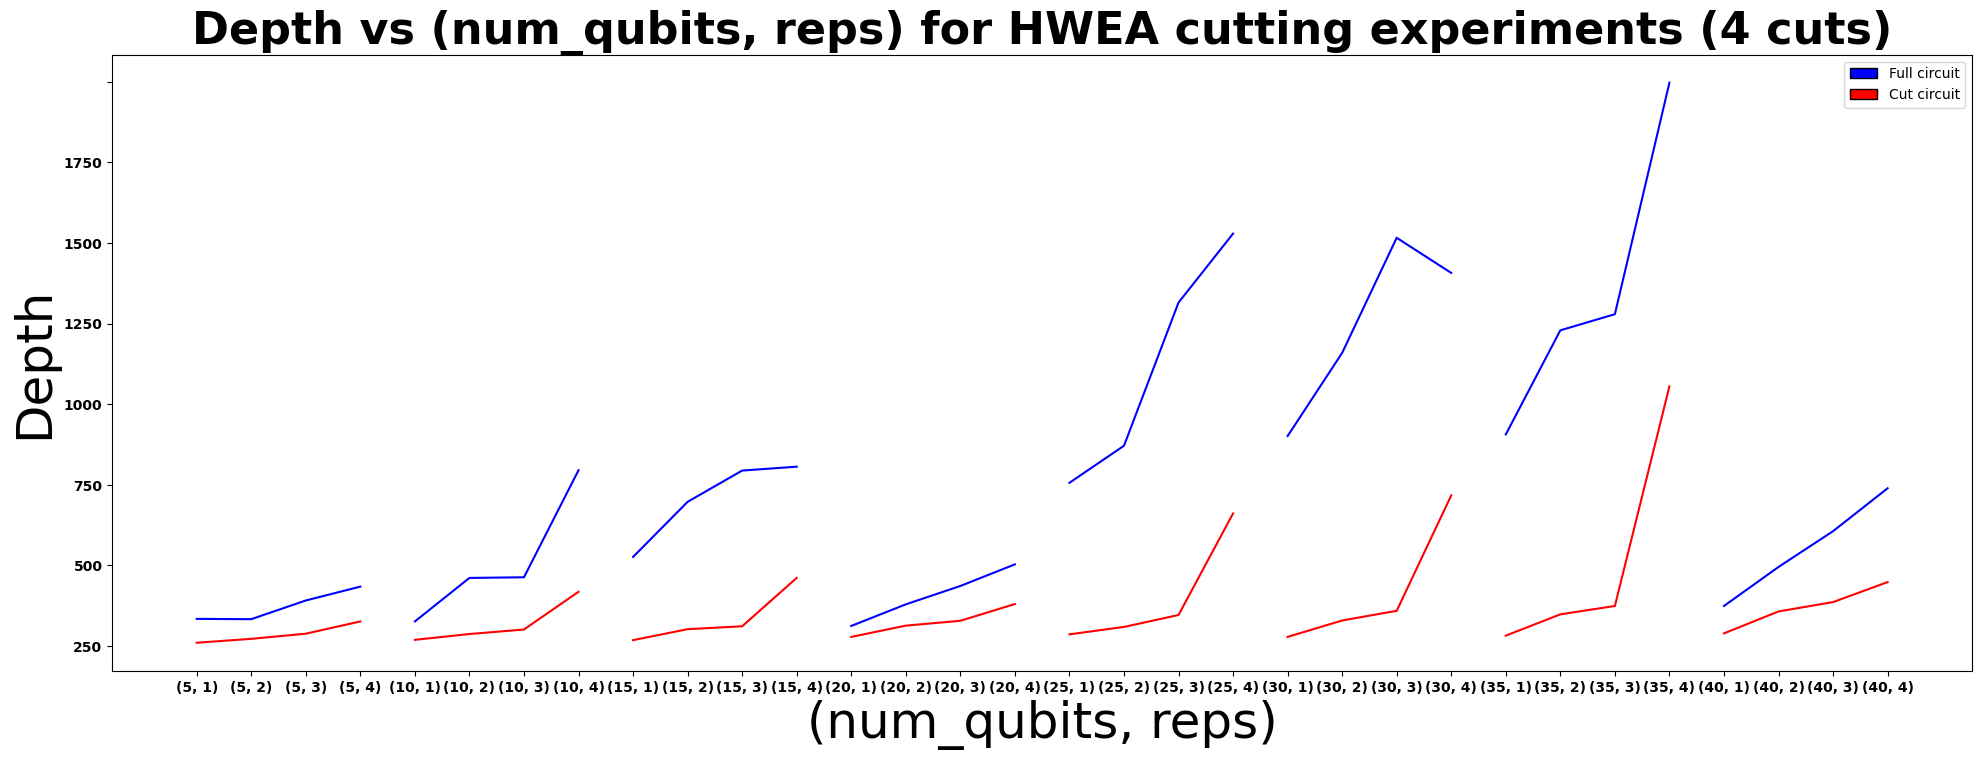

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.figure(figsize=(24, 8))
ax = plt.subplot()

plt.title("Depth vs (num_qubits, reps) for HWEA cutting experiments (4 cuts)", fontsize=32, fontweight='bold')

plt.plot(x_5, y_f_5, label="line 1", color="blue", linestyle="-")
plt.plot(x_5, y_c_5, label="line 1", color="red", linestyle="-")
plt.plot(x_10, y_f_10, label="line 1", color="blue", linestyle="-")
plt.plot(x_10, y_c_10, label="line 1", color="red", linestyle="-")
plt.plot(x_15, y_f_15, label="line 1", color="blue", linestyle="-")
plt.plot(x_15, y_c_15, label="line 1", color="red", linestyle="-")
plt.plot(x_20, y_f_20, label="line 1", color="blue", linestyle="-")
plt.plot(x_20, y_c_20, label="line 1", color="red", linestyle="-")
plt.plot(x_25, y_f_25, label="line 1", color="blue", linestyle="-")
plt.plot(x_25, y_c_25, label="line 1", color="red", linestyle="-")
plt.plot(x_30, y_f_30, label="line 1", color="blue", linestyle="-")
plt.plot(x_30, y_c_30, label="line 1", color="red", linestyle="-")
plt.plot(x_35, y_f_35, label="line 1", color="blue", linestyle="-")
plt.plot(x_35, y_c_35, label="line 1", color="red", linestyle="-")
plt.plot(x_40, y_f_40, label="line 1", color="blue", linestyle="-")
plt.plot(x_40, y_c_40, label="line 1", color="red", linestyle="-")

xticks =     [
        "(5, 1)",
        "(5, 2)",
        "(5, 3)",
        "(5, 4)",
        "(10, 1)",
        "(10, 2)",
        "(10, 3)",
        "(10, 4)",
        "(15, 1)",
        "(15, 2)",
        "(15, 3)",
        "(15, 4)",
        "(20, 1)",
        "(20, 2)",
        "(20, 3)",
        "(20, 4)",
        "(25, 1)",
        "(25, 2)",
        "(25, 3)",
        "(25, 4)",
        "(30, 1)",
        "(30, 2)",
        "(30, 3)",
        "(30, 4)",
        "(35, 1)",
        "(35, 2)",
        "(35, 3)",
        "(35, 4)",
        "(40, 1)",
        "(40, 2)",
        "(40, 3)",
        "(40, 4)",
    ]
yticks = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
plt.xticks(
    range(0, 32),
    xticks,
)
ax.set_xticklabels(xticks, fontweight='bold')
ax.set_yticklabels(yticks, fontweight='bold')
legend_elements = [
    Patch(facecolor='blue', edgecolor='black', label='Full circuit'),
    Patch(facecolor='red', edgecolor='black', label='Cut circuit')
]
plt.xlabel('(num_qubits, reps)', fontsize=36)
plt.ylabel('Depth', fontsize=36)
plt.legend(handles=legend_elements)
plt.savefig("plt_sherbrooke.png")

In [2]:
import pickle

#with open("gate_finding_results.pkl", "wb") as f:
#    pickle.dump(results, f)
with open("gate_finding_results.pkl", "rb") as f:
    results = pickle.load(f)